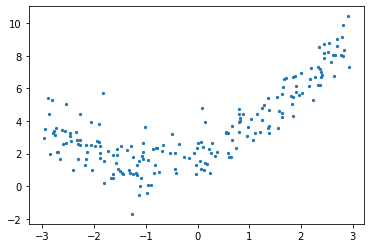

In [28]:
from numpy import genfromtxt
data = genfromtxt('mydata.csv', delimiter=',')
X,y=np.split(data,2,axis=1)
X=X.flatten()
y=y.flatten()
plt.scatter(X, y, s = 5)

In [29]:
x_tr, y_tr = np.array(X[:175]), np.array(y[:175])
x_val, y_val = np.array(X[175:]), np.array(y[175:])

print('Training set length: {}\nValidation set length: {}'.format(len(x_tr), len(x_val)))

Training set length: 175
Validation set length: 25


In [30]:
degree=3
W = [np.random.random() for _ in range(degree + 1)] #+1 is for W_0

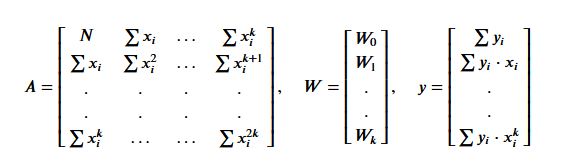

$AW=y$

$W=(A^T A)^{-1}A^Ty$

$A=(A^T A)^{-1}$ 

$y=A^Ty$


In [31]:
def update_weights(degree, x, y):
    A = np.linalg.inv(np.array( 
        [ [sum(np.power(x, i)) for i in range(j, degree + 1 + j)] for j in range(degree + 1) ]
    ))

    return np.dot(A, np.array( [ sum(y * np.power(x, i)) for i in range(degree+1) ] ))

def predict(W, x):
    return sum([W[i] * x**i for i in range(len(W))])
    
W = update_weights(3, x_tr, y_tr)
g = predict(W, x_tr)

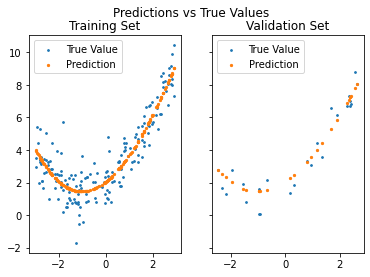

In [32]:
def plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val):
    fig, axs = plt.subplots(1, 2, sharey = True)
    fig.suptitle('Predictions vs True Values')

    axs[0].scatter(x_tr, y_tr, s = 3, label = 'True Value')
    axs[0].scatter(x_tr, g, s = 5, label = 'Prediction')
    axs[0].legend()
    axs[0].set_title('Training Set')

    axs[1].scatter(x_val, y_val, s = 3, label = 'True Value')
    axs[1].scatter(x_val, g_val, s = 5, label = 'Prediction')
    axs[1].legend()
    axs[1].set_title('Validation Set')
    
    plt.show()
    
g_val = sum([W[i] * x_val**i for i in range(len(W))])

plot_predictions(x_tr, y_tr, g, x_val, y_val, g_val)